In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download necessary resources from NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Load the dataset
df = pd.read_csv('/content/Restaurant_Reviews 1 (1).tsv', delimiter='\t', quoting=3)
df.shape

(1000, 2)

In [3]:
df["Review"][0]

'Wow... Loved this place.'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
# Initialize the stopwords and PorterStemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Initialize corpus to store the processed reviews
corpus = []

# Process each review
for i in range(0, 1000):
    # Clean the review: remove non-alphabetical characters
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])

    # Convert to lowercase
    review = review.lower()

    # Tokenize the review into words
    review_words = review.split()

    # Remove stopwords
    review_words = [word for word in review_words if word not in stop_words]

    # Stem the remaining words
    review_stemmed = [ps.stem(word) for word in review_words]

    # Rejoin the words back into a single string
    review = ' '.join(review_stemmed)

    # Add the processed review to the corpus
    corpus.append(review)

# Display the processed corpus
corpus[:1000]


['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [7]:
df.shape

(1000, 2)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)

In [9]:
df["Review"]

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


In [10]:
X=cv.fit_transform(corpus).toarray() # adding all the values to the corpus
X.shape

(1000, 1500)

In [11]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
X[0].max()

1

from here we are making the preprocessing of the data

In [13]:
# we are going to split the data into x and y (input and output) applaying the actual ml algorithms
y=df.iloc[:,-1].values #taking only the last column i.e output
y.shape


(1000,)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)



In [16]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier




In [17]:
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()


# Train the classifiers
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Make predictions on the test set
y_predG = clf1.predict(X_test)
y_predM = clf2.predict(X_test)
y_predB = clf3.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score


In [19]:
# Calculate accuracy scores
accuracy_G = accuracy_score(y_test, y_predG)
accuracy_M = accuracy_score(y_test, y_predM)
accuracy_B = accuracy_score(y_test, y_predB)

In [20]:
# Print the accuracy scores
print("Gaussian:", accuracy_G)
print("Multinomial:", accuracy_M)
print("Bernoulli:", accuracy_B)

Gaussian: 0.665
Multinomial: 0.785
Bernoulli: 0.785


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.73

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test, y_pred1)

0.75

In [23]:

from sklearn.metrics import accuracy_score


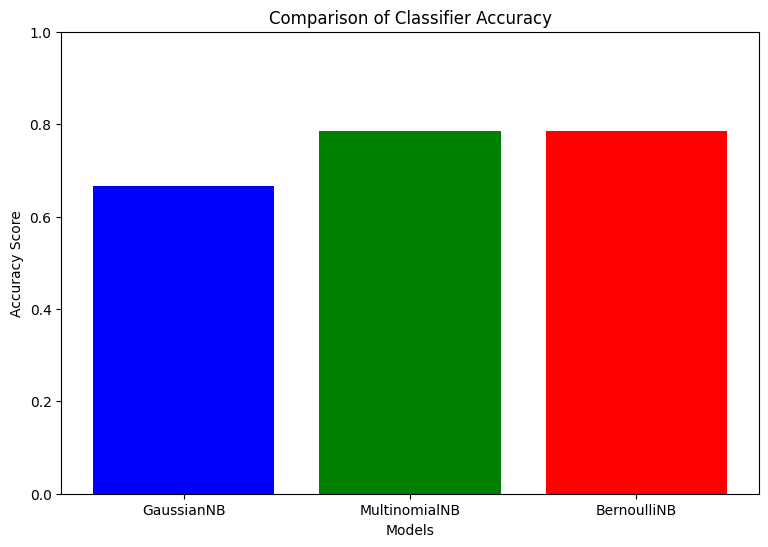

In [24]:
import matplotlib.pyplot as plt

models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
accuracies = [accuracy_G, accuracy_M, accuracy_B]

# Plotting the accuracy scores
plt.figure(figsize=(9, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Comparison of Classifier Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


     absolut  absolutley  accid  accommod  accomod  accordingli  account  ach  \
970      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
971      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
972      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
973      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
974      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
975      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
976      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
977      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
978      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
979      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
980      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
981      0.0         0.0    

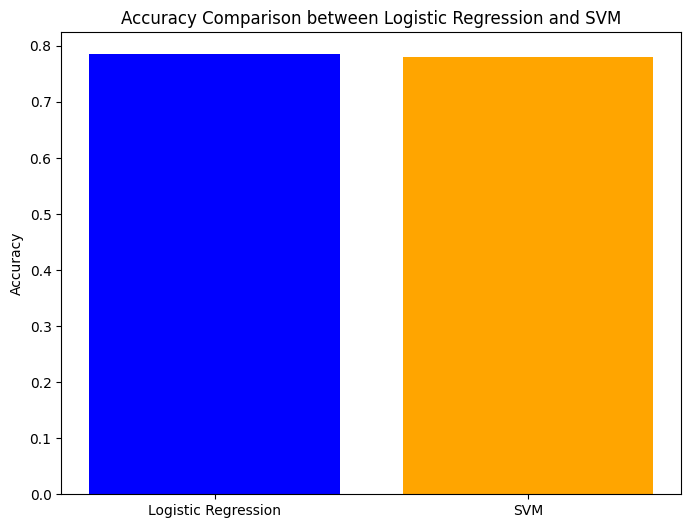

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

df = pd.DataFrame(data=X.todense(), columns=vectorizer.get_feature_names_out())
print(df.tail(30))

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

# Step 2: Initialize Logistic Regression and SVM models
lr = LogisticRegression()
svm = SVC()

# Step 3: Train both models
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Step 4: Predict using both models
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)

# Step 5: Calculate accuracy for both models
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Step 6: Print the accuracy results
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Step 7: Plotting the accuracy comparison

# Creating a bar plot to compare the accuracy
models = ['Logistic Regression', 'SVM']
accuracies = [lr_accuracy, svm_accuracy]

plt.figure(figsize=(8,6))
plt.bar(models, accuracies, color=['blue', 'orange'])

# Adding labels and title
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Logistic Regression and SVM')

# Display the plot
plt.show()




PCA ALGORITHEM

In [26]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [27]:
scaler=StandardScaler()
data_standardized=scaler.fit_transform(df)
pca=PCA(n_components=200) #Reduce to 2 dimension
principal_Components=pca.fit_transform(data_standardized)
print(principal_Components)
print(pca)




[[-0.10972121 -0.11610366 -0.11607856 ... -0.1479604  -0.42427015
  -0.45556368]
 [-0.08366956 -0.10431134 -0.11437208 ...  0.59582867 -1.42424321
  -0.53690647]
 [-0.11071902 -0.12152023 -0.13838341 ...  1.62926111  1.25482679
   0.30210796]
 ...
 [-0.12377738 -0.14129354 -0.18724762 ...  0.13013492 -0.5344848
  -0.12090663]
 [-0.17569707  0.7029933  -0.2344326  ...  0.1443095   0.2824393
   0.22127591]
 [ 2.48802965 -0.14283167 -0.48161906 ... -0.30157068  0.23756659
  -1.11592191]]
PCA(n_components=200)
